In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
tbb = pd.read_csv("./boids_TBB.csv", sep='_', names=['fsize', 'nbth', 'time'], skiprows=1)
omp = pd.read_csv("./boids_OMP.csv", sep='_', names=['fsize', 'nbth', 'time'], skiprows=1)
seq = pd.read_csv("./boids_seq.csv", sep='_', names=['fsize', 'time'], skiprows=1)

tbb = tbb.drop(tbb[tbb.nbth == 12].index)
omp = omp.drop(omp[omp.nbth == 12].index)

tbb = tbb.drop(tbb[(tbb.fsize < 2000) & (tbb.fsize > 49)].index)
omp = omp.drop(omp[(omp.fsize < 2000) & (omp.fsize > 49)].index)
seq = seq.drop(seq[(seq.fsize < 2000) & (seq.fsize > 49)].index)


## Plot sequentiel

   fsize       time
3      1   0.000014
2     10   0.000054
1    100   0.001542
5    250   0.009776
8    500   0.034137
0   1000   0.169932
4   2000   0.639910
6   3000   1.667020
7   5000   4.677460
9   8000  11.400500
[   1   10  100  250  500 1000 2000 3000 5000 8000]
[1.35230e-05 5.35300e-05 1.54193e-03 9.77613e-03 3.41367e-02 1.69932e-01
 6.39910e-01 1.66702e+00 4.67746e+00 1.14005e+01]


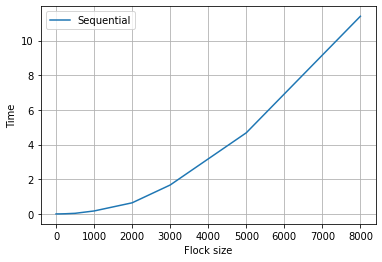

In [39]:
seq = seq.sort_values(by=['fsize'])

print(seq)
fsizes = seq['fsize'].to_numpy()
seq_times = seq['time'].to_numpy()

print(fsizes)
print(seq_times)

plt.plot(fsizes, seq_times, label="Sequential")
    
plt.legend()
plt.xlabel("Flock size")
plt.ylabel("Time")
plt.grid(visible=True, axis='both')
plt.show()

## PLot OMP

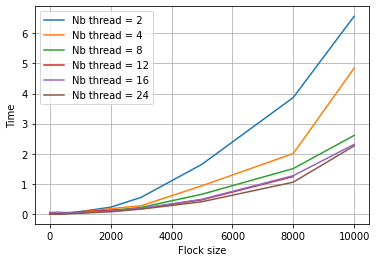

In [40]:
cols = omp["nbth"].values.ravel()
nb_threads_ite = pd.unique(cols)
nb_threads_ite.sort()

gb = omp.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})

gb = gb.reset_index()
gb.sort_values(by=['nbth'])


for nt in nb_threads_ite[1:] :
    df = gb[gb['nbth'] == nt]
    
    s = df['fsize'].to_numpy()
    t = df['time'].to_numpy()
    
    plt.plot(s, t, label="Nb thread = {}".format(nt))
    
plt.legend()
plt.xlabel("Flock size")
plt.ylabel("Time")
plt.grid(visible=True, axis='both')
plt.show()

## Plot TBB

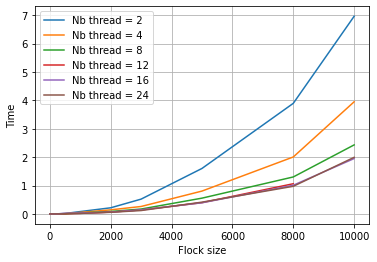

In [41]:
cols = tbb["nbth"].values.ravel()
nb_threads_ite = pd.unique(cols)
nb_threads_ite.sort()

gb = tbb.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})

gb = gb.reset_index()
gb.sort_values(by=['nbth'])


for nt in nb_threads_ite[1:] :
    df = gb[gb['nbth'] == nt]
    
    s = df['fsize'].to_numpy()
    t = df['time'].to_numpy()
    
    plt.plot(s, t, label="Nb thread = {}".format(nt))
    
plt.legend()
plt.xlabel("Flock size")
plt.ylabel("Time")
plt.grid(visible=True, axis='both')
plt.show()

## Final plot

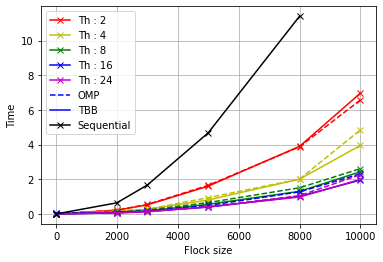

In [26]:

cols = tbb["nbth"].values.ravel()
nb_threads_ite = pd.unique(cols)
nb_threads_ite.sort()

gb = tbb.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})

gb = gb.reset_index()
gb.sort_values(by=['nbth'])


gb_omp = omp.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})
gb_omp = gb_omp.reset_index()
gb_omp.sort_values(by=['nbth'])


colors = ['xr', 'xy', 'xg', 'xb', 'xm']

for nt, c in zip(nb_threads_ite[1:], colors) :
    df = gb[gb['nbth'] == nt]    
    s = df['fsize'].to_numpy()
    t = df['time'].to_numpy()
    
    df_omp = gb_omp[gb_omp['nbth'] == nt]    
    s_omp = df_omp['fsize'].to_numpy()
    t_omp = df_omp['time'].to_numpy()


    plt.plot(s, t, c+'-')#, label="Th = {}".format(nt))
    plt.plot(s_omp, t_omp, c+'--')#,label="Th = {}".format(nt))
    plt.plot(0, 0, c+'-',label="Th : {}".format(nt))
    

seq = seq.sort_values(by=['fsize'])

fsizes = seq['fsize'].to_numpy()
seq_times = seq['time'].to_numpy()

plt.plot(0, 0, '--b', label="OMP")
plt.plot(0, 0, '-b', label="TBB")
plt.plot(fsizes, seq_times, '-xk', label="Sequential")
    
plt.legend()
plt.xlabel("Flock size")
plt.ylabel("Time")
plt.grid(visible=True, axis='both')
plt.show()

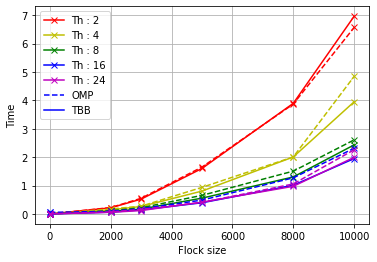

In [27]:

tbb = tbb.drop(tbb[(tbb.nbth == 24) | (tbb.nbth == 2)].index)
omp = omp.drop(omp[(omp.nbth == 24) | (omp.nbth == 2)].index)


cols = tbb["nbth"].values.ravel()
nb_threads_ite = pd.unique(cols)
nb_threads_ite.sort()

gb = tbb.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})

gb = gb.reset_index()
gb.sort_values(by=['nbth'])


gb_omp = omp.groupby(['nbth', 'fsize']).agg({
    'time' : np.min,
})
gb_omp = gb_omp.reset_index()
gb_omp.sort_values(by=['nbth'])


colors = ['xr', 'xy', 'xg', 'xb', 'xm']

for nt, c in zip(nb_threads_ite[1:], colors) :
    df = gb[gb['nbth'] == nt]    
    s = df['fsize'].to_numpy()
    t = df['time'].to_numpy()
    
    df_omp = gb_omp[gb_omp['nbth'] == nt]    
    s_omp = df_omp['fsize'].to_numpy()
    t_omp = df_omp['time'].to_numpy()


    plt.plot(s, t, c+'-')#, label="Th = {}".format(nt))
    plt.plot(s_omp, t_omp, c+'--')#,label="Th = {}".format(nt))
    plt.plot(0, 0, c+'-',label="Th : {}".format(nt))
    



plt.plot(0, 0, '--b', label="OMP")
plt.plot(0, 0, '-b', label="TBB")


plt.legend()
plt.xlabel("Flock size")
plt.ylabel("Time")
plt.grid(visible=True, axis='both')
plt.show()